In [1]:
import json
import numpy
from pprint import pprint

with open('/Users/elena/publicCodeRepos/overcode_data/iterPower-edx/output/solutions.json') as solutions_file:    
    solutions = json.load(solutions_file)

In [2]:
with open('/Users/elena/publicCodeRepos/overcode_data/iterPower-edx/output/variables.json') as vars_file:    
    solvars = json.load(vars_file)

In [3]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
from gensim import corpora, models, similarities

In [ ]:
# >>> corpus = [[(0, 1.0), (1, 1.0), (2, 1.0)],
# >>>           [(2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (8, 1.0)],
# >>>           [(1, 1.0), (3, 1.0), (4, 1.0), (7, 1.0)],
# >>>           [(0, 1.0), (4, 2.0), (7, 1.0)],
# >>>           [(3, 1.0), (5, 1.0), (6, 1.0)],
# >>>           [(9, 1.0)],
# >>>           [(9, 1.0), (10, 1.0)],
# >>>           [(9, 1.0), (10, 1.0), (11, 1.0)],
# >>>           [(8, 1.0), (10, 1.0), (11, 1.0)]]

In [5]:
#doc_matrix = numpy.zeros((len(solutions),len(solvars)))

corpus = []

for i,varIds in enumerate([sol['variableIDs'] for sol in solutions]):
    document = []
    print i, varIds
    for var_id in varIds:
        #doc_matrix[i,var_id-1] += 1
        for entry in document:
            if entry[0]==(var_id-1):
                print 'already in document'
        document.append((var_id-1,1.0))
    corpus.append(document)

0 [1, 2, 3, 4]
1 [2, 4, 5, 6]
2 [2, 3, 7]
3 [2, 3, 7]
4 [2, 3, 7]
5 [2, 3, 7]
6 [2, 3, 7]
7 [2, 3, 7]
8 [2, 3, 7]
9 [2, 3, 7]
10 [8, 9, 10]
11 [2, 3, 4, 7]
12 [3, 2, 11, 4]
13 [2, 3, 4, 7]
14 [2, 3, 4, 7]
15 [2, 3, 7]
16 [2, 3, 7]
17 [2, 12, 10]
18 [2, 3, 7]
19 [2, 3, 4, 13]
20 [2, 3, 4, 14]
21 [2, 3, 7]
22 [7, 12, 15]
23 [2, 3, 7]
24 [2, 3, 7]
25 [3, 2, 11, 4]
26 [2, 3, 7]
27 [16, 2, 10]
28 [17, 2]
29 [2, 3, 7]
30 [10, 12, 15]
31 [16, 2, 10]
32 [17, 2, 3]
33 [2, 3, 7]
34 [2, 3, 7]
35 [18, 19, 4, 2]
36 [2, 3, 4, 7]
37 [2, 3, 7]
38 [2, 3, 4, 7]
39 [12, 2, 20, 4]
40 [2, 21, 7]
41 [2, 3, 7]
42 [16, 2, 10]
43 [3, 2, 11, 4]
44 [2, 10, 6]
45 [16, 2, 10]
46 [16, 10, 22]
47 [2, 3, 4, 7]
48 [16, 4, 2, 20]
49 [2, 3, 7]
50 [24, 4, 12, 23]
51 [2, 3, 7]
52 [25, 2, 12]
53 [2, 3, 7]
54 [16, 2, 10]
55 [26, 10, 2]
56 [3, 2, 11, 4]
57 [26, 10, 4, 2]
58 [4, 2, 27, 28]
59 [2, 3, 7]
60 [2, 12, 10]
61 [2, 3, 7]
62 [2, 4, 29, 30]
63 [2, 3, 4, 14]
64 [32, 10, 2, 31]
65 [2, 12, 10]
66 [2, 12, 10]
67 [2, 3, 7]


In [6]:
corpus

[[(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0)],
 [(1, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(7, 1.0), (8, 1.0), (9, 1.0)],
 [(1, 1.0), (2, 1.0), (3, 1.0), (6, 1.0)],
 [(2, 1.0), (1, 1.0), (10, 1.0), (3, 1.0)],
 [(1, 1.0), (2, 1.0), (3, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (3, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (11, 1.0), (9, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (3, 1.0), (12, 1.0)],
 [(1, 1.0), (2, 1.0), (3, 1.0), (13, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(6, 1.0), (11, 1.0), (14, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(2, 1.0), (1, 1.0), (10, 1.0), (3, 1.0)],
 [(1, 1.0), (2, 1.0), (6, 1.0)],
 [(15, 1.0),

In [7]:
import gensim
lda = models.ldamodel.LdaModel(corpus,passes=10,alpha='auto') #num_topics=100

In [22]:
lda.print_topics(num_topics=100, num_words=10)

[(0,
  '0.307*1 + 0.306*6 + 0.305*11 + 0.002*2 + 0.001*3 + 0.001*17 + 0.001*10 + 0.000*126 + 0.000*128 + 0.000*125'),
 (1,
  '0.246*3 + 0.238*1 + 0.192*5 + 0.191*22 + 0.042*83 + 0.022*171 + 0.022*85 + 0.004*11 + 0.002*6 + 0.002*38'),
 (2,
  '0.259*1 + 0.243*141 + 0.132*15 + 0.122*156 + 0.014*9 + 0.003*6 + 0.003*5 + 0.002*16 + 0.002*17 + 0.002*2'),
 (3,
  '0.009*2 + 0.008*6 + 0.008*1 + 0.005*123 + 0.005*126 + 0.005*125 + 0.005*124 + 0.005*128 + 0.005*120 + 0.005*121'),
 (4,
  '0.282*68 + 0.223*1 + 0.114*3 + 0.097*6 + 0.096*122 + 0.007*15 + 0.006*19 + 0.003*29 + 0.002*9 + 0.002*2'),
 (5,
  '0.314*43 + 0.311*42 + 0.304*1 + 0.000*126 + 0.000*125 + 0.000*124 + 0.000*128 + 0.000*123 + 0.000*122 + 0.000*131'),
 (6,
  '0.240*9 + 0.170*46 + 0.155*11 + 0.137*23 + 0.058*5 + 0.035*91 + 0.035*90 + 0.035*89 + 0.035*146 + 0.035*147'),
 (7,
  '0.363*18 + 0.316*1 + 0.297*9 + 0.000*122 + 0.000*125 + 0.000*124 + 0.000*127 + 0.000*120 + 0.000*121 + 0.000*123'),
 (8,
  '0.320*5 + 0.302*1 + 0.291*6 + 0.026*

In [23]:
lda.top_topics(corpus, num_words=20)

[([(0.20781893004115229, '184'),
   (0.20781893004115229, '183'),
   (0.20781893004115229, '185'),
   (0.00205761316872428, '127'),
   (0.00205761316872428, '135'),
   (0.00205761316872428, '136'),
   (0.00205761316872428, '132'),
   (0.00205761316872428, '134'),
   (0.00205761316872428, '117'),
   (0.00205761316872428, '126'),
   (0.00205761316872428, '125'),
   (0.00205761316872428, '123'),
   (0.00205761316872428, '128'),
   (0.00205761316872428, '122'),
   (0.00205761316872428, '121'),
   (0.00205761316872428, '120'),
   (0.00205761316872428, '119'),
   (0.00205761316872428, '130'),
   (0.00205761316872428, '124'),
   (0.00205761316872428, '133')],
  -38.123094930796967),
 ([(0.0053763440860215058, '127'),
   (0.0053763440860215058, '134'),
   (0.0053763440860215058, '116'),
   (0.0053763440860215058, '136'),
   (0.0053763440860215058, '137'),
   (0.0053763440860215058, '133'),
   (0.0053763440860215058, '135'),
   (0.0053763440860215058, '128'),
   (0.0053763440860215058, '117'),


In [24]:
lda.top_topics(corpus, num_words=10)

[([(0.20781893004115229, '184'),
   (0.20781893004115229, '183'),
   (0.20781893004115229, '185'),
   (0.00205761316872428, '123'),
   (0.00205761316872428, '120'),
   (0.00205761316872428, '125'),
   (0.00205761316872428, '124'),
   (0.00205761316872428, '127'),
   (0.00205761316872428, '122'),
   (0.00205761316872428, '130')],
  0.69314718055994529),
 ([(0.0053763440860215058, '127'),
   (0.0053763440860215058, '129'),
   (0.0053763440860215058, '119'),
   (0.0053763440860215058, '120'),
   (0.0053763440860215058, '121'),
   (0.0053763440860215058, '122'),
   (0.0053763440860215058, '123'),
   (0.0053763440860215058, '124'),
   (0.0053763440860215058, '125'),
   (0.0053763440860215058, '126')],
  -4.1588830833596715),
 ([(0.0053763440860215058, '127'),
   (0.0053763440860215058, '129'),
   (0.0053763440860215058, '119'),
   (0.0053763440860215058, '120'),
   (0.0053763440860215058, '121'),
   (0.0053763440860215058, '122'),
   (0.0053763440860215058, '123'),
   (0.0053763440860215058

In [25]:
len(lda.top_topics(corpus, num_words=10))

100

In [34]:
solvars[183]['varName']

u'base'

In [29]:
solvars[184]['varName']

u'result'

In [30]:
solvars[185]['varName']

u'exp'

In [38]:
solvars[126]['varName']

u'base___5'

In [39]:
solvars[131]['varName']

u'exp___21'

In [40]:
solvars[130]['varName']

u'result___31'

In [43]:
print solvars[1]['varName']
print solvars[74]['varName']
print solvars[75]['varName']
print solvars[164]['varName']
#print solvars[3]['varName']
#print solvars[4]['varName']
#print solvars[5]['varName']

base
result___43
exp___28
result


In [44]:
print solvars[106]['varName']
print solvars[107]['varName']
print solvars[64]['varName']
print solvars[6]['varName']

baseInit
base___2
result___23
exp


In [45]:
# [(0.18400547452011945, '127'),
#    (0.10935556227394706, '1'),
#    (0.10677101968661293, '3'),
#    (0.10099827329307549, '153'),
#    (0.10099827329307549, '152'),
#    (0.10062558677798279, '77'),
#    (0.10058313374911808, '76'),

print solvars[127]['varName']
print solvars[1]['varName']
print solvars[3]['varName']
print solvars[153]['varName']
print solvars[152]['varName']
print solvars[77]['varName']
print solvars[76]['varName']

exp___11
base
exp___2
result___26
base___8
exp___12
base___15


In [46]:
# (0.30110895671057258, '9'),
#    (0.27192039986204464, '69'),
#    (0.25751903954026512, '107'),

print solvars[9]['varName']
print solvars[69]['varName']
print solvars[107]['varName']

exp___3
old_base
base___2


In [48]:
print solvars[1]['varName']
print solvars[2]['varName']
#(0.083884008642021057, '118'),
#  (0.083884008642021057, '133'),
#  (0.083884008642021057, '151'),
print solvars[118]['varName']
print solvars[133]['varName']
print solvars[151]['varName']

base
result
exp___23
y___2
exp___18


In [49]:
# (0.20485578126535692, '9'),
#    (0.20485578126535692, '93'),
#    (0.20485578126535692, '92'),
print solvars[9]['varName']
print solvars[93]['varName']
print solvars[92]['varName']

exp___3
base___11
x___5


In [51]:
lda.get_topic_terms(0, topn=10)

[(1, 0.30652195396724796),
 (6, 0.30631178860265201),
 (11, 0.30549559987168273),
 (2, 0.0017717490028881519),
 (3, 0.0010062029120794138),
 (17, 0.00081530953882572152),
 (10, 0.00065807544415462317),
 (126, 0.00043251017128753954),
 (128, 0.00043251017128753954),
 (125, 0.00043251017128753954)]

In [52]:
print solvars[1]['varName']
print solvars[6]['varName']
print solvars[11]['varName']

base
exp
result___2


In [54]:
print lda.get_document_topics([(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0)])
print lda.get_topic_terms(48, topn=10)

[(48, 0.80795506085515378)]
[(1, 0.25050932774329027), (3, 0.24277963002439762), (2, 0.22298160886673959), (0, 0.21978982912342526), (9, 0.0093705763529893585), (173, 0.0085942662410241673), (57, 0.0085942662410241673), (175, 0.0085942662410241673), (121, 0.0085942662410241656), (6, 0.0018088455091703932)]


In [11]:
topic_totals = []
for sol_index, doc in enumerate(corpus):
    print
    print sol_index
    for term in doc:
        print term[0],
    topics_for_doc = lda.get_document_topics(doc)
    #print topics_for_doc
    print
    for topic in topics_for_doc:
        #print
        print topic
        topic_totals.append(topic[0])


0
0 1 2 3
(82, 0.80783146311477794)

1
1 3 4 5
(70, 0.31407423737069173)
(90, 0.49565456800890395)

2
1 2 6
(4, 0.75963616309223059)

3
1 2 6
(21, 0.75988169347118406)

4
1 2 6
(4, 0.75963616309223048)

5
1 2 6
(4, 0.75963616309223048)

6
1 2 6
(13, 0.75954891367360922)

7
1 2 6
(21, 0.75988169347118395)

8
1 2 6
(4, 0.75963616309223059)

9
1 2 6
(4, 0.75963616309223048)

10
7 8 9
(2, 0.40615952323874233)
(20, 0.35544798705360631)

11
1 2 3 6
(11, 0.80812761108168296)

12
2 1 10 3
(52, 0.80795932792162906)

13
1 2 3 6
(11, 0.80812761107834019)

14
1 2 3 6
(11, 0.80812761108168296)

15
1 2 6
(21, 0.75988169347118406)

16
1 2 6
(13, 0.75954891367360933)

17
1 11 9
(29, 0.75990067331900701)

18
1 2 6
(4, 0.75963616025953284)

19
1 2 3 12
(7, 0.80777662120404026)

20
1 2 3 13
(83, 0.80778277392959463)

21
1 2 6
(21, 0.75988169347118395)

22
6 11 14
(63, 0.34848606870760612)
(87, 0.4132667208227282)

23
1 2 6
(4, 0.75963616200990569)

24
1 2 6
(13, 0.75954891367360933)

25
2 1 10 3
(52, 0.

In [12]:
topic_totals

[82,
 70,
 90,
 4,
 21,
 4,
 4,
 13,
 21,
 4,
 4,
 2,
 20,
 11,
 52,
 11,
 11,
 21,
 13,
 29,
 4,
 7,
 83,
 21,
 63,
 87,
 4,
 13,
 52,
 4,
 88,
 0,
 21,
 63,
 88,
 0,
 21,
 4,
 40,
 58,
 21,
 11,
 68,
 87,
 58,
 13,
 88,
 52,
 70,
 88,
 3,
 39,
 68,
 4,
 36,
 76,
 13,
 49,
 4,
 88,
 86,
 52,
 86,
 48,
 4,
 29,
 21,
 28,
 45,
 83,
 95,
 29,
 29,
 13,
 75,
 63,
 83,
 87,
 88,
 29,
 88,
 21,
 45,
 52,
 5,
 33,
 11,
 13,
 29,
 13,
 72,
 21,
 47,
 11,
 82,
 4,
 13,
 4,
 29,
 11,
 11,
 88,
 70,
 13,
 13,
 78,
 29,
 4,
 29,
 4,
 4,
 11,
 7,
 39,
 78,
 7,
 52,
 82,
 4,
 88,
 68,
 89,
 93,
 0,
 68,
 52,
 88,
 4,
 4,
 52,
 13,
 21,
 88,
 27,
 40,
 94,
 18,
 25,
 54,
 83,
 40,
 70,
 13,
 88,
 23,
 13,
 21,
 21,
 52,
 21,
 29,
 70,
 90,
 68,
 58,
 29,
 2,
 36,
 88,
 52,
 1,
 88,
 21,
 40,
 70,
 36,
 38,
 0,
 63,
 38,
 82,
 7,
 77,
 68,
 11,
 78,
 78,
 29,
 79,
 70,
 36,
 40,
 88,
 63,
 25,
 72,
 0,
 52,
 70,
 21,
 29,
 29,
 82,
 13,
 92,
 88,
 21,
 29,
 58,
 52,
 78,
 63,
 13,
 70,
 82,
 4,
 31,


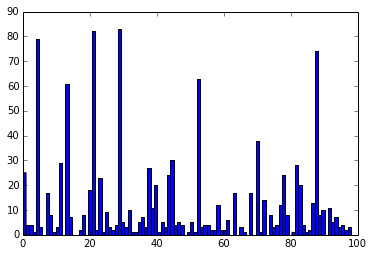

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.hist(topic_totals,bins=100)
plt.show()

In [61]:
for sol_index, doc in enumerate(corpus):
    print sol_index
    for term in doc:
        print term[0],
    topics_for_doc = lda.get_document_topics(doc)
    #print topics_for_doc
    for topic in topics_for_doc:
        print
        print topic
        for term in lda.get_topic_terms(topic[0], topn=10):
            print term
    print
    print

0
0 1 2 3
(48, 0.80795506085515378)
(1, 0.25050932774329027)
(3, 0.24277963002439762)
(2, 0.22298160886673959)
(0, 0.21978982912342526)
(9, 0.0093705763529893585)
(173, 0.0085942662410241673)
(57, 0.0085942662410241673)
(175, 0.0085942662410241673)
(121, 0.0085942662410241656)
(6, 0.0018088455091703932)


1
1 3 4 5
(51, 0.27048576379381967)
(5, 0.34456793112695933)
(1, 0.316181765269269)
(9, 0.29298747292459781)
(73, 0.023451002589612701)
(65, 0.00079629317109044672)
(11, 0.00046630723212243608)
(2, 0.00036519787948610324)
(15, 0.00022090630400121712)
(6, 0.00022090630400121712)
(127, 0.00011718766779016795)

(75, 0.53929691933875923)
(3, 0.31152781866690887)
(4, 0.28543722865164228)
(1, 0.25056536545641211)
(134, 0.064929351507965111)
(15, 0.028238585353959608)
(9, 0.00061162856504794368)
(16, 0.00061162856504794357)
(125, 0.00032446029739115385)
(126, 0.00032446029739115385)
(128, 0.00032446029739115385)


2
1 2 6
(36, 0.40892061839244093)
(2, 0.30415316211028942)
(6, 0.3025719636182

In [65]:
solutions[0].keys()

[u'count',
 u'lineIDs',
 u'error_vector',
 u'num_passed_tests',
 u'lines',
 u'number',
 u'testcases',
 u'id',
 u'phraseIDs',
 u'total_num_tests',
 u'variableIDs',
 u'members',
 u'test_input_outputs',
 u'correct',
 u'stack_distances']

In [66]:
solutions[0]['variableIDs']

[1, 2, 3, 4]

In [63]:
solutions[0]['members']

[u'10', u'13277', u'17046', u'24153', u'25608', u'32167', u'5541', u'8371']

[u'10002']

In [69]:
for sol_index, doc in enumerate(corpus):
    print sol_index
    for term in doc:
        print term[0],
    topics_for_doc = lda.get_document_topics(doc)
    #print topics_for_doc
    for topic in topics_for_doc:
        print
        print topic
        if topic[0] == 48:
            for term in lda.get_topic_terms(topic[0], topn=10):
                print term
    print
    print

0
0 1 2 3
(48, 0.80795506085515378)
(1, 0.25050932774329027)
(3, 0.24277963002439762)
(2, 0.22298160886673959)
(0, 0.21978982912342526)
(9, 0.0093705763529893585)
(173, 0.0085942662410241673)
(57, 0.0085942662410241673)
(175, 0.0085942662410241673)
(121, 0.0085942662410241656)
(6, 0.0018088455091703932)


1
1 3 4 5
(51, 0.27007631019519235)

(75, 0.53970637293738666)


2
1 2 6
(49, 0.75977379984936089)


3
1 2 6
(49, 0.75977379984936089)


4
1 2 6
(92, 0.75931837288318105)


5
1 2 6
(92, 0.75931837314454298)


6
1 2 6
(36, 0.75966593036406382)


7
1 2 6
(97, 0.75971193042921892)


8
1 2 6
(97, 0.75971193042921592)


9
1 2 6
(92, 0.75931837313052541)


10
7 8 9
(38, 0.37582406933637225)

(50, 0.38585174107266951)


11
1 2 3 6
(36, 0.80808074021280174)


12
2 1 10 3
(12, 0.80812287977384734)


13
1 2 3 6
(31, 0.80775685437216604)


14
1 2 3 6
(31, 0.80775685437216604)


15
1 2 6
(49, 0.75977379984936089)


16
1 2 6
(49, 0.75977379984920157)


17
1 11 9
(82, 0.75952262614583499)


18
1 2 

In [70]:
solutions[85]['members']

[u'11531']

In [71]:
solutions[108]['members']

[u'12035',
 u'1693',
 u'17672',
 u'18827',
 u'26614',
 u'28949',
 u'32066',
 u'5185',
 u'619',
 u'7027',
 u'7591']

In [72]:
solutions[153]['members']

[u'1310']

In [74]:
solutions[153]

{u'correct': True,
 u'count': 1,
 u'error_vector': [True, True, True, True, True, True, True, True],
 u'id': 154,
 u'lineIDs': {u'list': [1, 196, 37, 193, 74, 7, 49, 51, 310, 29],
  u'type': u'set'},
 u'lines': [{u'indent': 0, u'line_obj_ID': 1, u'phraseID': 1},
  {u'indent': 4, u'line_obj_ID': 193, u'phraseID': 3},
  {u'indent': 4, u'line_obj_ID': 37, u'phraseID': 2},
  {u'indent': 4, u'line_obj_ID': 74, u'phraseID': 8},
  {u'indent': 8, u'line_obj_ID': 49, u'phraseID': 45},
  {u'indent': 4, u'line_obj_ID': 29, u'phraseID': 29},
  {u'indent': 8, u'line_obj_ID': 310, u'phraseID': 4},
  {u'indent': 12, u'line_obj_ID': 51, u'phraseID': 5},
  {u'indent': 12, u'line_obj_ID': 196, u'phraseID': 6},
  {u'indent': 4, u'line_obj_ID': 7, u'phraseID': 7}],
 u'members': [u'1310'],
 u'num_passed_tests': 8,
 u'number': u'1310',
 u'phraseIDs': [1, 2, 3, 4, 5, 6, 7, 8, 45, 29],
 u'stack_distances': {u'1': 0.9117647058823529,
  u'10': 0.4107142857142857,
  u'100': 0.1984126984126984,
  u'101': 0.380952

In [73]:
solutions[173]['members']

[u'137', u'18123', u'19731', u'31874', u'46', u'4724', u'6964', u'9592']

In [75]:
solvars[0]

{u'id': 1,
 u'sequence': {u'iterPower(-4.52, 4)': [0, 1, 2, 3, 4],
  u'iterPower(-4.54, 9)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  u'iterPower(-6.11, 1)': [0, 1],
  u'iterPower(-6.45, 0)': [0],
  u'iterPower(-8.51, 8)': [0, 1, 2, 3, 4, 5, 6, 7, 8],
  u'iterPower(5.07, 0)': [0],
  u'iterPower(5.13, 10)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  u'iterPower(7.79, 0)': [0]},
 u'varName': u'i___2'}

In [76]:
solvars[1]

{u'id': 2,
 u'sequence': {u'iterPower(-4.52, 4)': [-4.52],
  u'iterPower(-4.54, 9)': [-4.54],
  u'iterPower(-6.11, 1)': [-6.11],
  u'iterPower(-6.45, 0)': [-6.45],
  u'iterPower(-8.51, 8)': [-8.51],
  u'iterPower(5.07, 0)': [5.07],
  u'iterPower(5.13, 10)': [5.13],
  u'iterPower(7.79, 0)': [7.79]},
 u'varName': u'base'}

In [77]:
solvars[2]

{u'id': 3,
 u'sequence': {u'iterPower(-4.52, 4)': [1,
   -4.52,
   20.430399999999995,
   -92.34540799999996,
   417.4012441599998],
  u'iterPower(-4.54, 9)': [1,
   -4.54,
   20.6116,
   -93.576664,
   424.83805456,
   -1928.7647677024,
   8756.592045368896,
   -39754.92788597479,
   180487.37260232554,
   -819412.671614558],
  u'iterPower(-6.11, 1)': [1, -6.11],
  u'iterPower(-6.45, 0)': [1],
  u'iterPower(-8.51, 8)': [1,
   -8.51,
   72.42009999999999,
   -616.295051,
   5244.670884009999,
   -44632.149222925094,
   379819.58988709253,
   -3232264.709939157,
   27506572.681582227],
  u'iterPower(5.07, 0)': [1],
  u'iterPower(5.13, 10)': [1,
   5.13,
   26.3169,
   135.005697,
   692.57922561,
   3552.9314273792997,
   18226.53822245581,
   93502.1410811983,
   479665.98374654725,
   2460686.4966197875,
   12623321.72765951],
  u'iterPower(7.79, 0)': [1]},
 u'varName': u'result'}

In [78]:
solvars[3]

{u'id': 4,
 u'sequence': {u'iterPower(-4.52, 4)': [4],
  u'iterPower(-4.54, 9)': [9],
  u'iterPower(-6.11, 1)': [1],
  u'iterPower(-6.45, 0)': [0],
  u'iterPower(-8.51, 8)': [8],
  u'iterPower(5.07, 0)': [0],
  u'iterPower(5.13, 10)': [10],
  u'iterPower(7.79, 0)': [0]},
 u'varName': u'exp___2'}

In [49]:
K = 25
lda = models.ldamodel.LdaModel(corpus,passes=10,alpha='auto',num_topics=K)

In [50]:
topic_totals = []
for sol_index, doc in enumerate(corpus):
    print
    print sol_index
    for term in doc:
        print term[0],
    topics_for_doc = lda.get_document_topics(doc)
    #print topics_for_doc
    print
    for topic in topics_for_doc:
        #print
        print topic
        topic_totals.append(topic[0])


0
0 1 2 3
(16, 0.82609487086215272)
(21, 0.012288901992449124)

1
1 3 4 5
(0, 0.54085410336814455)
(4, 0.17738057783963432)
(5, 0.12074833064846067)
(21, 0.012288899534042507)

2
1 2 6
(7, 0.011317658941011693)
(9, 0.010265719226339455)
(17, 0.010218422019526423)
(20, 0.78390872194211958)
(21, 0.015453737941742714)
(23, 0.012031582713062558)

3
1 2 6
(7, 0.011317658941003707)
(9, 0.010265719226338076)
(17, 0.010218422019525679)
(20, 0.78390873453251975)
(21, 0.015453725351381741)
(23, 0.012031582713033629)

4
1 2 6
(7, 0.011317658941548708)
(9, 0.010265719226310324)
(17, 0.010218422019571634)
(20, 0.01130400286058021)
(21, 0.78805845702077892)
(23, 0.012031582715007637)

5
1 2 6
(7, 0.011317658941548717)
(9, 0.010265719226310326)
(17, 0.010218422019571637)
(20, 0.01130400286061136)
(21, 0.78805845702074773)
(23, 0.012031582715007665)

6
1 2 6
(7, 0.011317658942603087)
(9, 0.010265719226536768)
(17, 0.010218422019671108)
(20, 0.38005613253073023)
(21, 0.41930632734541579)
(23, 0.012031

In [51]:
len(topic_totals)

5120

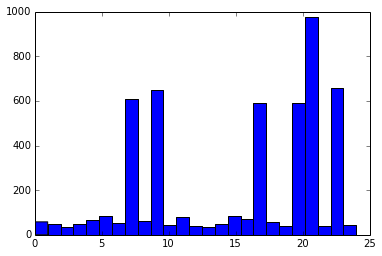

In [52]:
plt.hist(topic_totals,bins=K)
plt.show()

In [53]:
for topic_id in range(K):
    
    if len([tid for tid in topic_totals if tid==topic_id]) > 500:
        print 'popular topic',
        print topic_id
        for term in lda.get_topic_terms(topic_id, topn=10):
            print term
        for sol_index, doc in enumerate(corpus):
            topics_for_doc = lda.get_document_topics(doc)
            for topic in topics_for_doc:
                if topic[0] == topic_id:
                    print sol_index
        print
        print
                    

popular topic 7
(15, 0.31021242995222437)
(1, 0.28940354818268216)
(9, 0.2648623253971954)
(3, 0.040505704579611251)
(19, 0.02256946372968625)
(5, 0.0067908542678029888)
(115, 0.0067262206368291612)
(117, 0.006726220636754798)
(134, 0.0067262206365154408)
(71, 0.0034439956090110291)
2
3
4
5
6
7
8
9
10
15
16
17
18
21
22
23
24
26
27
28
29
30
31
32
33
34
37
39
40
41
42
44
45
46
48
49
51
52
53
54
55
59
60
61
65
66
67
70
71
72
73
74
76
78
80
81
82
86
87
88
89
92
93
94
95
97
98
99
100
101
102
109
110
112
114
115
117
118
119
121
122
124
127
128
129
130
131
132
134
135
139
140
142
145
146
149
150
151
152
160
161
164
165
166
167
169
170
171
172
174
175
176
177
178
182
183
184
187
188
191
194
195
196
197
198
200
202
203
204
206
207
209
210
212
213
214
215
216
217
219
220
221
222
224
225
229
230
231
233
234
235
238
239
243
244
245
246
250
251
252
254
255
256
259
263
264
266
267
269
270
272
273
279
280
282
283
285
288
293
294
297
300
303
304
305
309
310
311
313
315
316
318
319
321
322
323
325
326


In [59]:
solutions[1]['members']

[u'10002']

In [41]:
print solvars[9]
print
print solvars[15]
print
print solvars[1]


{u'varName': u'exp___3', u'id': 10, u'sequence': {u'iterPower(-4.52, 4)': [4, 3, 2, 1], u'iterPower(5.07, 0)': [0], u'iterPower(-6.11, 1)': [1], u'iterPower(-8.51, 8)': [8, 7, 6, 5, 4, 3, 2, 1], u'iterPower(7.79, 0)': [0], u'iterPower(-4.54, 9)': [9, 8, 7, 6, 5, 4, 3, 2, 1], u'iterPower(-6.45, 0)': [0], u'iterPower(5.13, 10)': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]}}

{u'varName': u'result___3', u'id': 16, u'sequence': {u'iterPower(-4.52, 4)': [-4.52, 20.430399999999995, -92.34540799999996, 417.4012441599998], u'iterPower(5.07, 0)': [5.07, 1], u'iterPower(-6.11, 1)': [-6.11], u'iterPower(-8.51, 8)': [-8.51, 72.42009999999999, -616.295051, 5244.670884009999, -44632.149222925094, 379819.58988709253, -3232264.709939157, 27506572.681582227], u'iterPower(7.79, 0)': [7.79, 1], u'iterPower(-4.54, 9)': [-4.54, 20.6116, -93.576664, 424.83805456, -1928.7647677024, 8756.592045368896, -39754.92788597479, 180487.37260232554, -819412.671614558], u'iterPower(-6.45, 0)': [-6.45, 1], u'iterPower(5.13, 10)': [

In [ ]:
for sol_index, doc in enumerate(corpus):
    print sol_index
    for term in doc:
        print term[0],
    topics_for_doc = lda.get_document_topics(doc)
    #print topics_for_doc
    for topic in topics_for_doc:
        print
        print topic
        if topic[0] == 48:
            for term in lda.get_topic_terms(topic[0], topn=10):
                print term
    print
    print

In [57]:

for sol_index, doc in enumerate(corpus):
    print
    print sol_index
    for term in doc:
        print term[0],
    topics_for_doc = lda.get_document_topics(doc)
    #print topics_for_doc
    print
    topics = []
    for topic in topics_for_doc:
        #print
        print topic
        topics.append(topic[0])
    if 7 in topics and 9 in topics:
        print '7 and 9 in both'
    if 7 in topics and 9 not in topics:
        print '7 but not 9'
    if 7 not in topics and 9 in topics:
        print '9 but not 7'


0
0 1 2 3
(16, 0.82609487086263755)
(21, 0.012288901991964321)

1
1 3 4 5
(0, 0.41128436382752825)
(4, 0.42087373140063455)
(21, 0.012288899214022229)

2
1 2 6
(7, 0.011317658941003651)
(9, 0.010265719226338066)
(17, 0.010218422019525672)
(20, 0.78390873459127686)
(21, 0.015453725292624801)
(23, 0.012031582713033433)
7 and 9 in both

3
1 2 6
(7, 0.01131765894154889)
(9, 0.010265719226310352)
(17, 0.010218422019571653)
(20, 0.011304002861368003)
(21, 0.78805845701999033)
(23, 0.0120315827150083)
7 and 9 in both

4
1 2 6
(7, 0.011317658941553376)
(9, 0.010265719226311053)
(17, 0.010218422019572067)
(20, 0.011304002889846211)
(21, 0.78805845699149024)
(23, 0.012031582715024549)
7 and 9 in both

5
1 2 6
(7, 0.01131765894100363)
(9, 0.010265719226338062)
(17, 0.010218422019525671)
(20, 0.78390873461321908)
(21, 0.015453725270682561)
(23, 0.012031582713033361)
7 and 9 in both

6
1 2 6
(7, 0.011317658941549026)
(9, 0.010265719226310373)
(17, 0.010218422019571665)
(20, 0.011304002861963695)
(

In [61]:
hdp = models.hdpmodel.HdpModel(corpus, {})

IndexError: index 0 is out of bounds for axis 1 with size 0